In [40]:
def get_tag_files(tag_path, suffix='csv'):
    
    tag_path = Path(tag_path)
    all_files = [str(tag_file) for tag_file in tag_path.rglob('*.' + suffix)]
    
    return all_files

# tag_files = get_tag_files(tag_path)

In [5]:
def create_csv_paths(data_types, base='', exp='', full=True):
    
    csv_paths = {}
    
    for data_type in data_types:

        if not full:
            csv_dir = '../data/2016_2019/samples/'
            e = '_' + str(base) + 'e' + str(exp)
            csv_path = csv_dir + data_type + e + '.csv'
        else:
            csv_dir = '../data/2016_2019/full/'
            e = ''
            csv_path = csv_dir + data_type + e + '.csv'
            
        csv_paths[data_type] = csv_path
    
    return csv_paths

data_types = ['answers', 'comments', 'notes', 'questions', 'users', 'wikis', 'tags']
csv_paths = create_csv_paths(data_types)

In [2]:
# DATA
import pandas as pd
import numpy as np


# SYSTEM
import os, sys
from pathlib2 import Path

# MISC 
import re
import csv
from itertools import izip

# PLOTTING
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [52]:
data_type = 'users'

sample = False

m = 25
exp = 2

if sample:
    csv_dir = '../data/2016_2019/samples/'
    e = '_' + str(m) + 'e' + str(exp)
    csv_path = csv_dir + data_type + e + '.csv'
else:
    csv_dir = '../data/2016_2019/full/'
    e = ''
    csv_path = csv_dir + data_type + e + '.csv'

data_types = ['answers', 'comments', 'notes', 'questions', 'users', 'wikis', 'paths', 'tags', 'node_tags', 'terms']
csv_paths = create_csv_paths(data_types)

tag_dir =  '../data/2016_2019/full/tags'
tag_files = get_tag_files(tag_dir)

# print csv_paths


In [43]:
# use_cols = ['nid', 'uid', 'tid']
tags_2012_2016 = pd.read_csv('../data/2016_2019/full/tags/node_tags_03_2012-08_2016.csv')
print tags_2012_2016.shape[0]
tags_2012_2016.sort_values('date').head()

27547


,tid,nid,uid,date
1611,14,898,100,1331066904
2006,38,897,1,1331067381
1262,14,905,1,1331231368
1009,11,897,12,1331233655
3151,126,897,12,1331233655


In [ ]:
1330560000 - 1370044800 # 03-1-2012 - 06-1-2013
1370044800 - 1401580800 # 06-1-2013 - 06-1-2014
1401580800 - 1433116800 # 06-1-2014 - 06-1-2015
1433116800 - 1464739200 # 06-1-2015 - 06-1-2016
1464739200 - 1470009600 # 06-1-2016 - 08-1-2016 + node_tags_08_2016-06_2017.csv'

In [44]:
timespans = ['03-1-2012 - 06-1-2013', '06-1-2013 - 06-1-2014', '06-1-2014 - 06-1-2015', 
             '06-1-2015 - 06-1-2016', '06-1-2016 - 08-1-2016']

file_names = ['node_tags_' + timespan.replace('-1-', '_').replace(' - ', '-') + '.csv' for timespan in timespans]
file_names

['node_tags_03_2012-06_2013.csv',
 'node_tags_06_2013-06_2014.csv',
 'node_tags_06_2014-06_2015.csv',
 'node_tags_06_2015-06_2016.csv',
 'node_tags_06_2016-08_2016.csv']

In [45]:
tags_with_dates = pd.read_csv('../data/2016_2019/full/tags/node_tags_03_2012-08_2016.csv')
# # tags_with_dates.head()

# beg = (tags_with_dates['date'] > 1330560000)
# end = (tags_with_dates['date'] < 1338508800)

# # print tags_with_dates.shape[0]
# df = tags_with_dates.loc[beg & end].head()
# # print df.shape[0]
# df.head()
# df['date'] = 2012

# # print df.head(0)

years = ['2012', '2013', '2014', '2015', '2016']
intervals = [[1330560000, 1370044800], [1370044800, 1401580800], [1401580800, 1433116800], 
             [1433116800, 1464739200], [1464739200, 1470009600]]

for epochs, year, file_name in zip(intervals, years, file_names):
    
    beg = (tags_with_dates['date'] > epochs[0])
    end = (tags_with_dates['date'] < epochs[1])
    
    df = tags_with_dates.loc[beg & end]
    df['date'] = year
    
    print df.shape[0]
    print df.head(1)
    
    df.to_csv('../data/2016_2019/full/tags/' + file_name, index=False)

/home/skilfullycurled/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4885
   tid  nid  uid  date
0    1  289    1  2012
6441
   tid  nid  uid  date
2    1  419    1  2013
5264
   tid   nid  uid  date
8    1  2309    1  2014
8588
    tid    nid  uid  date
23    1  12095    1  2015
2369
     tid    nid  uid  date
307    2  13168  379  2016


In [ ]:
#    4886 node_tags_03_2012-06_2013.csv
#    6442 node_tags_06_2013-06_2014.csv
#    5265 node_tags_06_2014-06_2015.csv
#    8589 node_tags_06_2015-06_2016.csv
#    2370 node_tags_06_2016-08_2016.csv
#   10373 node_tags_06_2017-06_2018.csv
#   11008 node_tags_06_2018-04_2019.csv
#    5079 node_tags_08_2016-06_2017.csv
#   54012 total

In [47]:
#     node_tags_06_2016-08_2016.csv # 2370
other_files = ['node_tags_08_2016-06_2017.csv', 'node_tags_06_2017-06_2018.csv', 'node_tags_06_2018-04_2019.csv']
other_years = ['2016', '2017', '2018']
tag_dir = '../data/2016_2019/full/tags/'

for file_name, year in zip(other_files, other_years):
    df = pd.read_csv(tag_dir + file_name)
    df['date'] = year
    
    print df.shape[0]
    print df.head(1)
    
    df.to_csv(tag_dir + file_name, index=False)

5078
   tid   nid  uid  date
0    1  4091    7  2016
10372
   tid  nid  uid  date
0    1  583    7  2017
11007
   tid  nid  uid  date
0    1   92    7  2018


## LOAD TAG USAGE AND TERM DATA

In [54]:
tag_files = get_tag_files(tag_dir)[:-1] # WILL FIX LATER

# LOAD CSV'S INTO DATAFRAME DROP DATE (DATAPOINT IS NO LONGER AVAILABLE COULD BE MERGED IN A FUTURE WITH MORE TIME)
use_cols = ['nid', 'uid', 'tid', 'date']
tag_dfs = [pd.read_csv(tag_file, usecols=use_cols) for tag_file in tag_files]

# REORDER TAG DF COLUMNS IN PREP WITH TERM DATA MERGE
tag_dfs = [tag_df[use_cols] for tag_df in tag_dfs]

# CONCAT THE FRAMES INTO ONE BIG ONE
tag_usage = pd.concat(tag_dfs)

# CHECK OUT THE RESULTS!
tag_usage.sample(10)

,nid,uid,tid,date
9189,17910,564795,19047,2018
1397,12761,461120,1032,2015
4318,3827,1,6405,2013
2451,4096,1,1262,2012
451,16176,525300,163,2017
5218,15367,420760,14323,2017
3147,8900,554,4741,2013
6611,18778,579767,18177,2018
162,16763,501996,120,2018
1517,13308,461120,13267,2016


In [56]:
# LOAD TERM DATA
use_cols = ['tid', 'name', 'count']
terms = pd.read_csv(csv_paths['terms'], usecols=use_cols)
terms.sample(10)

,tid,name,count
8763,16031,add-on,2.0
8392,15660,place:united-states,6.0
1789,4368,watch-house-on-fox,1.0
7385,14652,paris-apartments-on-rent,1.0
7493,14761,activity:workshop-series,2.0
6322,13589,lionfish,2.0
4541,11710,mapknitter-development,3.0
8885,16153,question:sensitivity,3.0
10962,18230,soc-2018-final-reportsoc,1.0
8362,15630,sulfur-hexafluoride,1.0


## PARSE TERM DATA

In [57]:
# MARK POWER TAGS
terms['power'] = terms['name'].str.contains(':')
terms.loc[terms['power'] == True].head()

,tid,name,count,power
754,2349,events:boston,5.0,True
755,2350,list:plots-boston,3.0,True
756,2360,events:new-york-city,12.0,True
757,2361,list:plots-nyc,1.0,True
763,2369,list:plots-gulfcoast,1.0,True


In [58]:
# https://stackoverflow.com/a/41320210/6023530
print 'ROWS WITH NAN\'S:', '\n'
print 'TID:', terms['tid'].isnull().sum(), '\n', 'NAME:', terms['name'].isnull().sum()
print 'COUNT:', terms['count'].isnull().sum(), '\n', 'POWER:', terms['power'].isnull().sum()

ROWS WITH NAN'S: 

TID: 0 
NAME: 2
COUNT: 214 
POWER: 2


In [59]:
# REMOVE ROWS W/O A NAME B/C THEN NO TAG TO APPLY FUNCTION TO
terms.dropna(subset=['name', 'power'], inplace=True)

In [60]:
# https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
# https://stackoverflow.com/a/35373340/6023530

def split_power_tags(row):
    
    split_row = row['name'].split(':')#, n=1, expand=True)
    
    if len(split_row) == 2: 
        row['name'] = split_row[1]
        row['power_type'] = split_row[0]
    else:
        row['power_type'] = 'npt'
    
    return row['name'], row['power_type']

# power_test = terms.sample(20).copy()
# power_test['name'], power_test['power_type'] = izip(*power_test.apply(split_power_tags, axis=1))
# power_test = power_test[['tid', 'name', 'power_type', 'count', 'power']]
# power_test.head()

In [61]:
terms.iloc[-20:-15] # GOOD BUT REPEATABLE MIX OF POWER/NON-POWER

,tid,name,count,power
13047,20315,laga,1.0,False
13048,20316,redirect:pipeline-webinar,1.0,True
13049,20317,psn,1.0,False
13050,20318,activity:thermal-flashlight-assembly,5.0,True
13051,20319,pirateship,1.0,False


In [62]:
terms['name'], terms['power_type'] = izip(*terms.apply(split_power_tags, axis=1))
terms = terms[['tid', 'name', 'power_type', 'count', 'power']]

In [63]:
# O. M. G. It wooorked!
terms.iloc[-20:-15]

,tid,name,power_type,count,power
13047,20315,laga,npt,1.0,False
13048,20316,pipeline-webinar,redirect,1.0,True
13049,20317,psn,npt,1.0,False
13050,20318,thermal-flashlight-assembly,activity,5.0,True
13051,20319,pirateship,npt,1.0,False


## MERGE WITH TAG USAGE

In [64]:
print tag_usage.shape[0]
tag_usage.tail(5)

54004


,nid,uid,tid,date
2364,721,1,13811,2016
2365,5215,7,13812,2016
2366,10112,7,13812,2016
2367,10691,7,13812,2016
2368,11533,7,13812,2016


In [65]:
print 'ROWS WITH NAN\'S:', '\n'
print 'NID:', tag_usage['nid'].isnull().sum()
print 'UID:', tag_usage['uid'].isnull().sum()
print 'TID:', tag_usage['tid'].isnull().sum()

ROWS WITH NAN'S: 

NID: 0
UID: 0
TID: 0


In [66]:
print terms.shape[0]
terms.tail(5)

13065


,tid,name,power_type,count,power
13062,20330,phun,npt,1.0,False
13063,20331,sprinkler,npt,1.0,False
13064,20332,trung,npt,1.0,False
13065,20333,10.823098,lat,1.0,True
13066,20334,106.629663,lon,1.0,True


In [91]:
# https://stackoverflow.com/a/12098586/6023530
selection = list(terms.iloc[-20:-15]['tid'])
tag_usage[tag_usage['tid'].isin(selection)]

print 'LEFT (MANY) \n', tag_usage[tag_usage['tid'].isin(selection)], '\n'
print 'RIGHT(ONE) \n', terms.iloc[-20:-15], '\n'

# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#brief-primer-on-merge-methods-relational-algebra
merged = pd.merge(tag_usage, terms, on='tid', how='left')

print 'MERGED'
print merged[merged['tid'].isin(selection)].drop(['power', 'uid'], axis=1), '\n' # NOT FOR REAL DROP!

print 'TOTALS \n'
print 'TAG USAGE:', '\t', tag_usage.shape[0], tag_usage.shape[1]
print 'TERMS:', '\t\t', terms.shape[0], terms.shape[1]
print 'MERGED:', '\t', merged.shape[0], merged.shape[1]

LEFT (MANY) 
         nid     uid    tid  date
10989  19111  584933  20315  2018
10990  18421       1  20316  2018
10991  19113  584971  20317  2018
10992    625       1  20318  2018
10993   9922       1  20318  2018
10994  11581       1  20318  2018
10995    627       1  20319  2018 

RIGHT(ONE) 
         tid                         name power_type  count  power
13047  20315                         laga        npt    1.0  False
13048  20316             pipeline-webinar   redirect    1.0   True
13049  20317                          psn        npt    1.0  False
13050  20318  thermal-flashlight-assembly   activity    5.0   True
13051  20319                   pirateship        npt    1.0  False 

MERGED
         nid    tid  date                         name power_type  count
21361  19111  20315  2018                         laga        npt    1.0
21362  18421  20316  2018             pipeline-webinar   redirect    1.0
21363  19113  20317  2018                          psn        npt    1.

In [92]:
print 'WITH USER 461120:', merged.shape[0] # 54004
merged = merged.loc[merged['uid'] != 461120]
print 'WITHOUT USER 461120:', merged.shape[0] # 48118

WITH USER 461120: 54004
WITHOUT USER 461120: 48118


In [100]:
merged = merged[tag_cols[:3] + tag_cols[4:-1] + ['date', 'power']]
merged.to_csv(csv_paths['tags'], index=False)
tags = pd.read_csv(csv_paths['tags'])
tags[tags['tid'].isin(selection)]

(48118, '../data/2016_2019/full/tags.csv')

In [96]:
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018]

for year in years:
    year_df = tags.loc[tags['date'] == year]
    year_df.to_csv('../data/2016_2019/full/tags/merged/' + 'tags_' + str(year) + '.csv', index=False)
    print year_df.shape[0]

4885
6441
5264
4477
5672
10372
11007


## SEPPERATE POWER TAG TYPES

In [78]:
power_tag_counts = tags['power_type'].value_counts().reset_index()
power_tag_counts.columns = ['power_type', 'count']
# power_tag_counts = power_tag_counts[['power_type', 'count']]
power_tag_counts.head(20)
# power_tag_counts[20:40]

,power_type,count
0,npt,44866
1,question,2389
2,activity,1100
3,lat,988
4,lon,979
5,response,810
6,parent,361
7,with,350
8,barnstar,240
9,event,211


In [344]:
#

# ['question', 'activity', 'with', 'barnstar' 'event', 'replication', 'place',  ]

# LIST: GOOGLE GROUP TAGS, list:plots-spectrometry
# WITH: THE USERS WHO ALSO WROTE THE NOTE, with:bsugar
# BARNSTAR: CONTENT AWARDED A BARNSTAR


# https://stackoverflow.com/a/38309823/6023530
# tags.loc[tags['power_type'] == 'barnstar'].groupby('name')['nid'].nunique()#value_counts

,power_type,count
0,npt,44866
1,question,2389
2,activity,1126
3,lat,988
4,lon,979
5,response,810
6,parent,361
7,with,350
8,barnstar,240
9,event,211


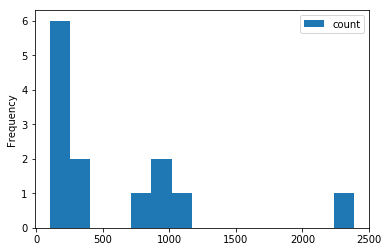

In [329]:
count_gt_one = (power_tag_counts['count'] > 100)
not_npt = (power_tag_counts['power_type'] != 'npt')
filtered = power_tag_counts.loc[count_gt_one & not_npt]
filtered.plot(kind='hist', bins=15)
# plt.show()

In [352]:
power_categories = ['question', 'activity', 'with', 'barnstar' 'event', 'replication', 'place']

# LIST: GOOGLE GROUP TAGS, list:plots-spectrometry
# WITH: THE USERS WHO ALSO WROTE THE NOTE, with:bsugar
# BARNSTAR: CONTENT AWARDED A BARNSTAR

# COMBINE TWO CATEGORIES
# tags.loc[tags['power_type'] == 'activities', 'power_type'] = 'activity'
# tags.loc[tags['power_type'] == 'events', 'power_type'] = 'place'

# https://stackoverflow.com/a/38309823/6023530
tags.loc[tags['power_type'] == 'events'].groupby('name')['nid'].nunique()#value_counts

In [79]:
power_categories = ['question', 'activity', 'with', 'barnstar' 'event', 'replication', 'place']

power_tag_counts[power_tag_counts['power_type'].isin(power_categories)]

# power_tag_counts = tags['power_type'].value_counts().reset_index()

,power_type,count
1,question,2389
2,activity,1100
7,with,350
11,replication,197
14,place,100
